Each pixel of an RGB image contains one value for each of the 3 channels: R (red), G (green) and B (blue). Using k-means clustering, we can divide all pixels of a given image into k clusters and assign each pixel the color represented by the nearest centroid (i.e. the center of gravity of the group to which the pixel was assigned). With this action, an image composed of millions of colors can be compressed into an image containing only k colors.

a) Load the image moraine_lake.png (e.g. using the PIL library) and treat each pixel as a single point with 3 dimensions.

In [18]:
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np
from sklearn.cluster import KMeans

In [19]:
image = Image.open("moraine_lake.png")
pixels = np.array(list(image.getdata()))
print(pixels)

[[20 37 53]
 [25 42 58]
 [39 54 73]
 ...
 [13 46 77]
 [ 7 40 73]
 [ 9 44 76]]


Number of clusters:  1
2.153030e+09
--------------------
Number of clusters:  2
6.732953e+08
--------------------
Number of clusters:  3
4.457047e+08
--------------------
Number of clusters:  4
3.454640e+08
--------------------
Number of clusters:  5
2.735813e+08
--------------------
Number of clusters:  6
2.283667e+08
--------------------
Number of clusters:  7
1.898545e+08
--------------------
Number of clusters:  8
1.678773e+08
--------------------
Number of clusters:  9
1.487192e+08
Immersion lower than 1.5*10^8
--------------------
Number of clusters:  10
1.325127e+08
Immersion lower than 1.5*10^8
--------------------
Number of clusters:  11
1.184306e+08
Immersion lower than 1.5*10^8
--------------------
Number of clusters:  12
1.077488e+08
Immersion lower than 1.5*10^8
--------------------
Number of clusters:  13
9.972361e+07
Immersion lower than 1.5*10^8
--------------------
Number of clusters:  14
9.177001e+07
Immersion lower than 1.5*10^8
--------------------
Number of cluster

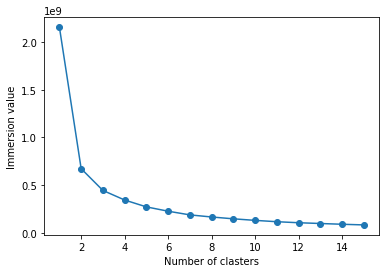

In [20]:
#The number of clusters to be tested
clusters_max = 15 + 1

inertia_measures = []
centroids = []
assignments = []
arguments = np.arange(1, clusters_max, 1)

# Training the model for a different number of clusters and counting for each version of the inertia value.
for n_cluster in range(1, clusters_max):
    #Grouping should be made for the argument random_state = 1 for a maximum of 100 iterations, 
    #and the starting places of the centroids are to be selected using the k-means ++ method.
    clustering = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=100, random_state=1)
    clustering.fit(pixels)
    
    #Assignment of point data to centroids
    assignments.append(clustering.labels_)
    
    #Inertia and centroids for "n_cluster" clusters
    inertia_measures.append(clustering.inertia_)
    centroids.append(clustering.cluster_centers_) #group centers of gravity
    
    print("Number of clusters: ", n_cluster)
    print("{:e}".format(inertia_measures[n_cluster-1]))
    
    #Select the smallest of the numbers as the number k for the final division,
    #for which the inertia value is less than 1.5 * 10 ^ 8
    if (inertia_measures[n_cluster-1]) < 1.5*10**8:
        print("Immersion lower than 1.5*10^8")
    print("--------------------")

fig, ax = plt.subplots()
ax.plot(arguments, inertia_measures, marker='o')
ax.set_xlabel('Number of clasters')
ax.set_ylabel('Immersion value')
plt.show()

I choose the smallest number k: 9

The coordinates of all obtained centroids are rounded to the nearest integer.

In [132]:
#len(centroids) ; print(centroids[9-1])
centroid = centroids[9-1].round().astype(int)
print(centroid)

[[ 42 139 186]
 [ 13  65  91]
 [201 215 224]
 [ 17  42  46]
 [168 172 179]
 [ 16 100 135]
 [ 91  97  48]
 [ 96 129 150]
 [115 189 234]]


In [266]:
print(assignments[9-1])
len(assignments[9-1])

[3 3 1 ... 1 3 1]


165120

For grouping on the number of clusters determined in this way, assign each pixel a rounded value of the center of gravity to which it was assigned.

In [134]:
pixels_final = [] #Array with assigned rounded pixels
                 # values of the center of gravity for which it is assigned
    
for i in assignments[9-1]:
    pixels_final.append(centroid[i])


pixels_final = np.array(pixels_final).astype(int)
print(pixels_final)
print("----------------")
print(pixels)

[[17 42 46]
 [17 42 46]
 [13 65 91]
 ...
 [13 65 91]
 [17 42 46]
 [13 65 91]]
----------------
[[20 37 53]
 [25 42 58]
 [39 54 73]
 ...
 [13 46 77]
 [ 7 40 73]
 [ 9 44 76]]


Original image:

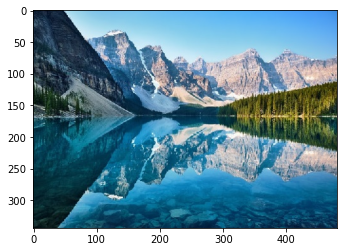

In [67]:
import cv2


image=cv2.imread("moraine_lake.png")

#Loading of the original image from np.array
image=pixels.reshape((image.shape)).astype('uint8')
plt.imshow(image)

In [76]:
# I saved the input image the way it will save the image after clustering
# to compare the weight of images saved from the array before and after clustering

#325 KB
cv2.imwrite('moraine_lake_input.png', cv2.cvtColor(image, cv2.COLOR_RGB2BGR)) 

True

Obraz po klasteryzacji:

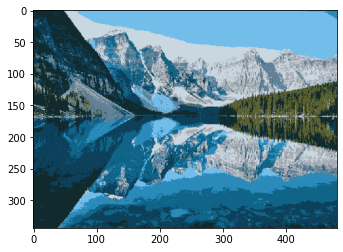

In [72]:
#reading the resulting image after clustering
image_out=pixels_final.reshape((image.shape)).astype('uint8')
plt.imshow(image_out)

d) Save the created image in a .png file

In [75]:
#108 KB
cv2.imwrite('moraine_lake_output.png', cv2.cvtColor(image_out, cv2.COLOR_RGB2BGR))

True

e) (2 points) Reduce the dimensionality of the original image moraine_lake.png to 2 principal components using the principal component analysis (PCA). List the total percentage of the explained variance by the 2 most significant principal components.

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.model_selection import train_test_split

Using principal component analysis (PCA) reduce the dimensionality of the original image moraine_lake.png to 2 principal components.

In [91]:
pixels_pca = pixels
pca = PCA(n_components=2)
pca.fit(pixels_pca)
pixels_pca=pca.transform(pixels_pca)

List the total percentage of the explained variance by the 2 most significant principal components.

In [87]:
print(pca.explained_variance_ratio_)
print("Sum of explained variance ratio ",np.sum(pca.explained_variance_ratio_) * 100, "%")

[0.86528019 0.12893225]
Sum of explained variance ratio  99.4212436828237 %


Make a scatter plot of all image pixels after the PCA transformation into 2 components. The color of a given point on the graph is to correspond to its assignment in the k-means grouping from the previous sub-points. Create a legend that will assign a color from the chart to a color from the k-means mapping (e.g. blue is cluster 1 from k-means method, green is cluster 2, etc.). For the legend, use a color map that will allow to distinguish them clearly, e.g. 'Paired', i.e. add the argument cmap = plt.get_cmap ('Paired').

In [185]:
print(pixels_pca)

[[-134.95599342   25.76219223]
 [-126.29899212   25.76911532]
 [-102.57855597   25.28741193]
 ...
 [-119.88448042    3.92193473]
 [-129.09144738    2.58853627]
 [-123.92804475    1.76730281]]


In [196]:
#Mapping centroid coordinates to colors
from webcolors import rgb_to_hex

colors = []
for i in range (len(centroid)):
    colors.append(rgb_to_hex((centroid[i][0], centroid[i][1], centroid[i][2])))

print(colors)

['#2a8bba', '#0d415b', '#c9d7e0', '#112a2e', '#a8acb3', '#106487', '#5b6130', '#608196', '#73bdea']


In [203]:
#Create a color table that corresponds to RGB points with "pixels" and the color is mapped by centroid values.

pixels_color = []
for i in assignments[9-1]:
    pixels_color.append(colors[i])

Chart mapped with true colors from the image

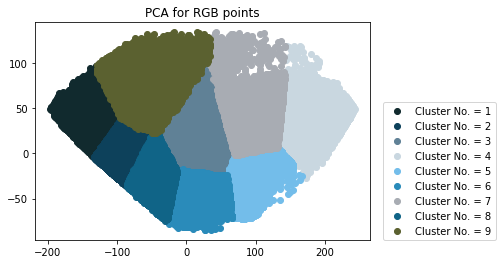

In [269]:
import pandas as pd

cfilter = lambda col: df[df['color']==col]
df = pd.DataFrame({"x": pixels_pca[:, 0], "y": pixels_pca[:, 1], "color": pixels_color})

fig, ax = plt.subplots()
for i, color in enumerate(df['color'].unique()):
    filtered = cfilter(color)
    ax.scatter(filtered['x'], filtered['y'], c=color, label=f'Cluster No. = {i+1}')
    
ax.legend()
plt.title("PCA for RGB points")
plt.legend(loc=(1.04, 0))
plt.show()

A graph with READABLE colors according to the content of the task

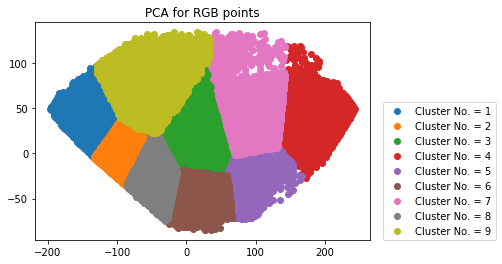

In [270]:
fig, ax = plt.subplots()
for i, color in enumerate(df['color'].unique()):
    filtered = cfilter(color)
    ax.scatter(filtered['x'], filtered['y'], label=f'Cluster No. = {i+1}')
    
ax.legend()
plt.title("PCA for RGB points")
plt.legend(loc=(1.04, 0))
plt.show()